# Module M5 -- Support Vector Machines

This material is adapted from the book Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow by Geron Aurelien.


# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Iris dataset

The iris dataset is a famous machine learning dataset.

It contains data on 150 iris flowers of three different species:
* Iris setosa
* Iris versicolor
* Iris viginica

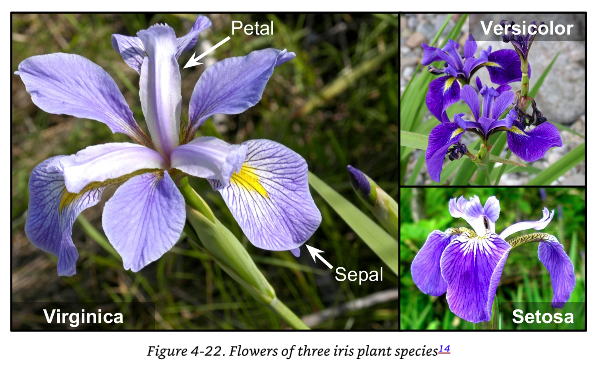


For each flower, the dataset contains:
* sepal length
* sepal width
* petal length
* petal width


### Loading the iris dataset

The iris dataset is one of the built-in datasets in scikit-learn.

We can load it like this:


In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris

It is not necessary, but we could load the data and feature_names into a DataFrame:

In [ ]:
import pandas as pd

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris

In [ ]:
X = iris["data"][:, (2, 3)]  # : gets all rows; (2,3) gets (petal length, petal width)
X

In [ ]:
y = (iris["target"]).astype(np.float64)  # Iris virginica
y

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# recall that 0='setosa', 1='versicolor', 2='virginica'

plt.scatter(X[:,0][y==0], X[:,1][y==0], color="blue")   # setosa
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="green")  # versicolor
plt.scatter(X[:,0][y==2], X[:,1][y==2], color="red")    # virginica


#### Focus on setosa versus versicolor

For this example, we will focus only on distinguishing the Iris setosa versus the Iris versicolor:

In [ ]:
X = iris["data"][:, (2, 3)]
y = iris["target"].astype(np.float64)

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]  # use only the setosa and veriscolor rows
y = y[setosa_or_versicolor]  # use only the setosa and veriscolor rows


In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# recall that 0='setosa', 1='versicolor'

plt.scatter(X[:,0][y==0], X[:,1][y==0], color="blue")
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="green")



# Linear SVM Classification

We can see that the Iris setosa and Iris versicolor classes are *linearly separable* -- meaning that we can draw a decision boundary that completely separates the two classes.

Indeed, there are many possible linear decision boundaries we could draw (left side of Figure 5-1):

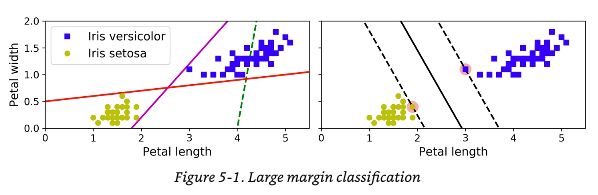


The problem with the boundaries on the left side of Figure 5-1 are that:
* the red and purple lines come very close to instances at the boundaries
    * this means that these boundaries may not work well on new data
* the dashed line doesn't even completely separate the classes

### Large margin classification

The right side of Figure 5-1 shows the decision boundary of an SVM classifier:
* the solid line separates the two classes, and
* is as far away as possible from the closest training instances

We can think of an SVM classifer as fitting the widest possible street between the classes.

The dashed lines are the edges of the "street" and are called the *support vectors*.

### SVMs and feature scaling

SVMs are very sensitive to feature scales, so we will typically want to use feature scaling when we use SVM.

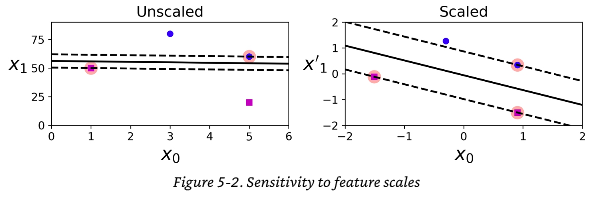


### Soft Margin Classification

Using a strict condition that all instances must be "off the street" is called *hard margin classification*.

Sometimes, this is too strict.

For example, some data may not be linearly separable.

And, hard margin is sensitive to outliers.

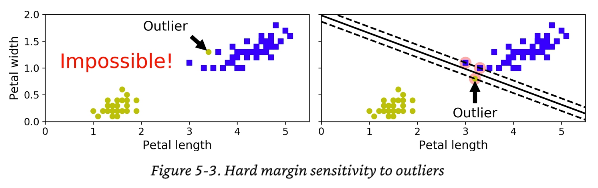

Instead, we can use *soft margin classification* that allows some margin violations.

Of course, we don't want a lot of margin violations (i.e., instances that lie in the middle of wrong side of the street).

The goal is to find a good balance of:
* keeping the street as large as possible
* limiting the number of margin violations

For SVMs, the hyperparameter ``C`` can be used to control this balance:
* small C values will result in a larger street and more margin violations
* large C values will result in a smaller street and fewer margin violations

Typically, we will prefer fewer margin violations.

However, in the model below, we might prefer the larger street (left) since it will probably generalize better.

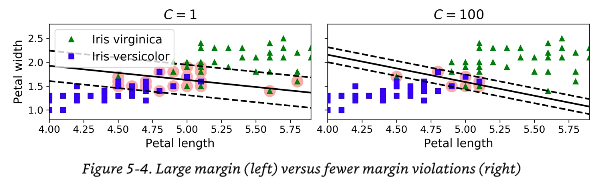



## Pipeline

Below is a complete pipeline for:
* using a StandardScaler to scale the features
* and then training a LinearSVM model
    * using the LinearSVC class with C=1 and the hinge loss function

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # : gets all rows; (2,3) gets (petal length, petal width)
y = iris["target"].astype(np.float64)

setosa_or_veriscolor = (y==0) | (y==1)
X = X[setosa_or_veriscolor]  # use only the setosa and veriscolor rows
y = y[setosa_or_versicolor]  # use only the setosa and veriscolor rows

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

We can then use the model to make predictions for a new flower with a petal length of 5.5 and petal width of 1.7:

In [ ]:
svm_clf.predict([[5.5, 1.7]])

### SVC class versus LinearSVC

In the example above, we used the LinearSVC class.

Instead, we could use the ``SVC`` class with a linear kernel.

We will talk more about kernels later in this module.

In [ ]:
lk_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svc_linear", SVC(kernel="linear", C=1, random_state=42)),
    ])

lk_svm_clf.fit(X, y)
lk_svm_clf.predict([[5.5, 1.7]])

# Nonlinear SVM Classification

Linear SVM works well in many situations.

However, there are many datasets that will not perform well with a linear model (e.g., ones that are not linearly separable).

One approach is to add features, such as polynomial features -- like we did in a previous module on Polynomial Regression.

Consider the following example:
* the left side is not linearly separable
* the right side includes a new feature, x<sub>2</sub> = x<sup>2</sup>

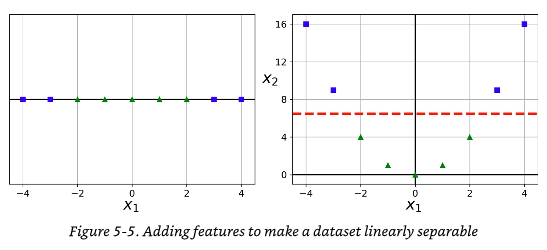

By adding a feature x<sub>2</sub> = x<sup>2</sup>, sometimes we can create linearly separable data.


#### Many moons dataset

We can test this out using the "moons" toy dataset.

We could use a pipeline with the PolynomialFeatures transformer:

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15)



In [ ]:
X.shape

In [ ]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000))
    ])

polynomial_svm_clf.fit(X, y)


Here is a plot of the predictions:


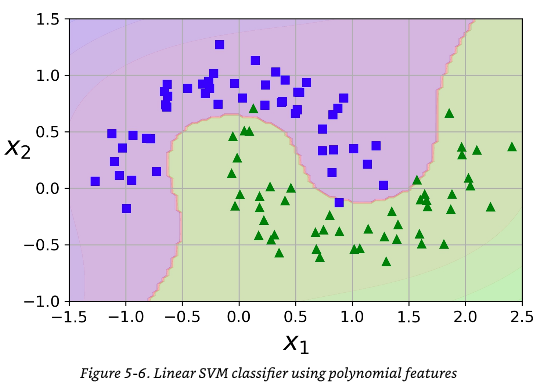

## Polynomial Kernel

Adding polynomial features can be a great approach.

However:
* a low polynomial degree cannot deal with very complex datasets
* a high polynomial degree creates a lot of features
    * recall that PolynomialFeatures also adds all combinations (e.g., a^2, a^3, b^2, b^3, ab, ab^2, b^2a)
    * this can make the model too slow

A mathematical technique called the ``kernel trick`` can help solve this problem.

The kernel trick allows you to get the same result as adding many polynomial features, but without actually having to add them.

This means that the number of features does not have to grow so large.

#### Using the kernal trick

The ``LinearSVC`` class in scikit-learn does NOT support the kernel trick.

However, the ``SVC`` class does.

Below is code to implement a SVM with a third-degree Polynomial kernel.

The coef0 hyperparameter controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.  It can be used to help control overfitting and underfitting.


In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Here are plots of predictions using SVM with a Polynomial kernel with different parameters (d=degree, r=coef0, C=C):

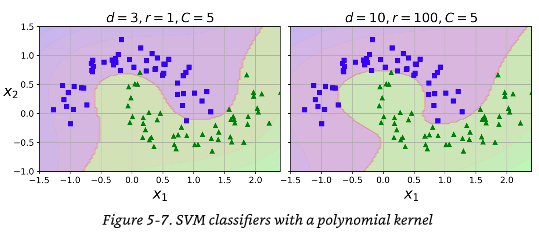



## Similarity Features

Another technique to address nonlinear data is to add features computed using a similarity function.

A similarity function measures how close each instance is to a *landmark*.

For example, consider the 1D dataset we looked at earlier.

We will add two landmarks: one at x<sub>1</sub>=-2, and one at x<sub>1</sub>=1

We can then define a similarity function.

In this case, we will use the Gaussian Radial Basis Function (RBF), calculated as:

    gRBF(x, lm, gamma) = exp(-gamma * || (x-lm) || ^ 2)

where the Gaussian RBF takes three parameters:
* the point x
* the landmark
* a parameter gamma, we will use 0.3

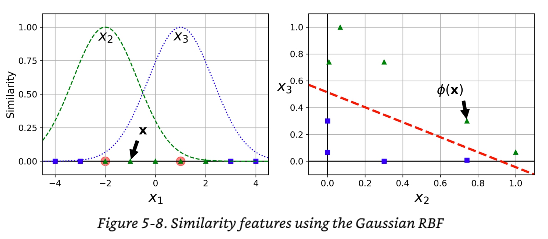

We will use the Gaussian RBF to compute two new features.

For example, consider instance x1=-1

So we will add a feature based on the distance of x from the first landmark:

    x2 = gRBF(-1, -2, 0.3) = exp(-0.3 * ||(-1-(-2))||^2) = exp(-0.3 * 1^2) = exp(-0.3*1) = exp(-0.3) ~= 0.74

And a second feature based on the distance of x from the second landmark:

    x3 = gRBF(-1, 1, 0.3) = exp(-0.3 * ||(-1-1)||^2) = exp(-0.3 * 2^2) = exp(-0.3*4) = exp(-1.2) ~= 0.30

The plot on the right shows the new features plotted against each other and is now linearly separable:

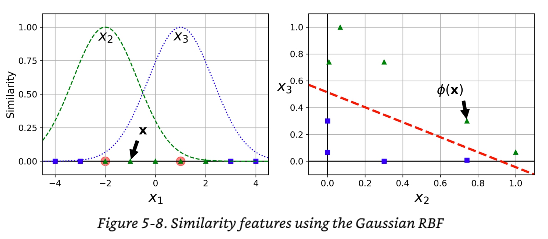


How do you select landmarks?

One approach is to create landmarks at every instance.

However, this can make the number of features grow large.


## Gaussian RBF Kernel

To help address this, we can again use the *kernel trick*, this time with an "rbf" kernel:

(gamma and C are both hyperparameters)


In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)


Below are plots of an SVM classifier using an RBF kernel.

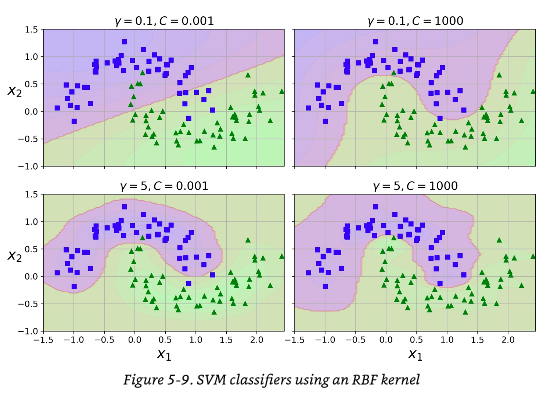


Note that:
* C is the hyperparameter for SVM that we have seen before
* increasing gamma makes the decision boundary wiggle around more
* descreasing gamma make the decision boundary smoother
